LAB1


In [8]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

In [2]:
#подготовим данные
data = pd.read_csv('WineQT.csv')
data = data.drop(columns='Id')
X = data[data.columns[:-1]]
y = data['quality']
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

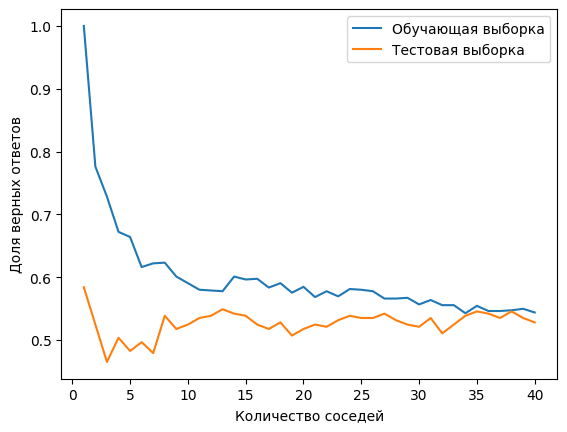

In [7]:
#словари для хранения оценок
train_scores = {}
test_scores = {}

#цикл по количеству соседей от 1 до 40 (включительно)
for n in range(1, 41):
    clf = KNeighborsClassifier(n_neighbors=n)
    clf.fit(X_train, y_train)
    
    #оценка модели на обучающей и тестовой выборках
    train_scores[n] = clf.score(X_train, y_train)
    test_scores[n] = clf.score(X_test, y_test)

#построение графиков
plt.plot(list(train_scores.keys()), list(train_scores.values()), label='Обучающая выборка')
plt.plot(list(test_scores.keys()), list(test_scores.values()), label='Тестовая выборка')

#оформление графиков
plt.xlabel('Количество соседей')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()


Из графика можно сделать вывод, что наилучшее количество соседей 10-15

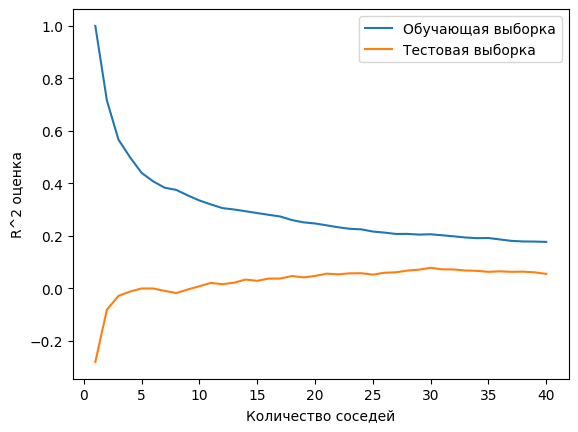

In [9]:
#словари для хранения оценок
train_scores = {}
test_scores = {}

#цикл по количеству соседей от 1 до 40 (включительно)
for n in range(1, 41):
    reg = KNeighborsRegressor(n_neighbors=n)
    reg.fit(X_train, y_train)
    
    #оценка модели на обучающей и тестовой выборках с использованием R^2 метрики
    train_scores[n] = reg.score(X_train, y_train)
    test_scores[n] = reg.score(X_test, y_test)

#построение графиков
plt.plot(list(train_scores.keys()), list(train_scores.values()), label='Обучающая выборка')
plt.plot(list(test_scores.keys()), list(test_scores.values()), label='Тестовая выборка')

#оформление графиков
plt.xlabel('Количество соседей')
plt.ylabel('R^2 оценка')
plt.legend()
plt.show()


Для регрессии наилучшее число соседей находится в диапазоне от 5 до 10